In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [708]:
# Importing the training dataset into a pandas dataframe
df_train = pd.read_csv("C:/Users/rashm/Desktop/6Sense/6sense_DS_TakeHome_Challenge/2021_6sense_DS_Takehome_Challenge/training.tsv", sep = '\t', header = None)
# df_test = pd.read_csv("C:/Users/rashm/Desktop/6Sense/6sense_DS_TakeHome_Challenge/2021_6sense_DS_Takehome_Challenge/test.tsv", sep = '\t', header = None)

In [709]:
df_train.head()

,0,1,2
0,00002acbe042d69,2013-07-11,EmailOpen
1,00002acbe042d69,2013-07-11,FormSubmit
2,00002acbe042d69,2013-07-15,EmailOpen
3,00002acbe042d69,2013-07-17,EmailOpen
4,00002acbe042d69,2013-07-18,EmailOpen


In [710]:
# Giving proper column values according to the description
df_train.columns = ['User_ID','Activity_Date','Activity_Type']

In [711]:
# Understanding the dataset better
# Getting the descriptive statstics parameters for the dataset

df_train.describe(include = 'all')

,User_ID,Activity_Date,Activity_Type
count,4918677,4918677,4918677
unique,341568,671,7
top,2cd311cc3ef2d0c,2014-06-18,EmailOpen
freq,2718,50184,3191732


In [712]:
# Checking for missing values in the dataset

df_train.isnull().sum()

User_ID          0
Activity_Date    0
Activity_Type    0
dtype: int64

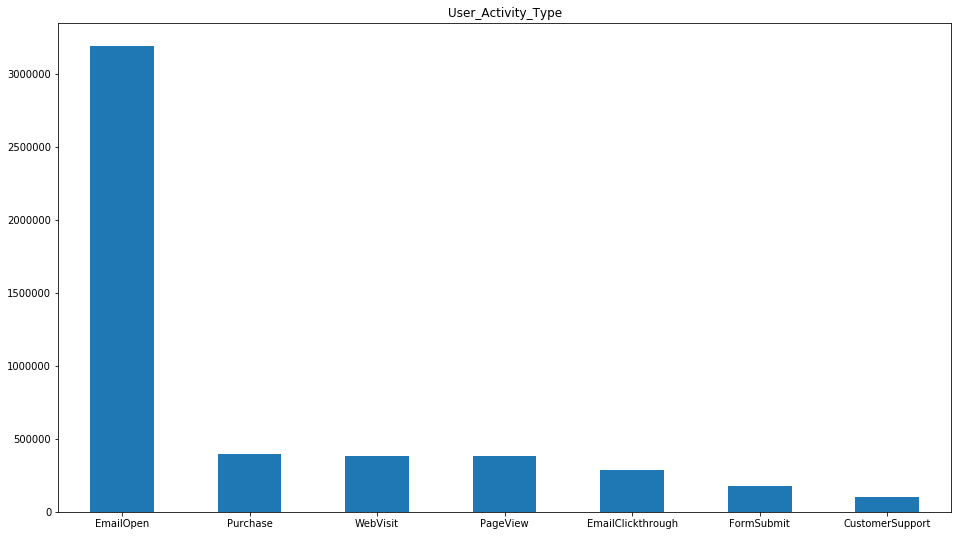

In [713]:
# Univariate Analysis to understand better the distribution of user activity across number of users

df_train['Activity_Type'].value_counts().plot(kind='bar', title = 'User_Activity_Type', figsize=(16,9))
plt.xticks(rotation=0)
plt.show() 

In [714]:
df_train['Activity_Type'] = df_train['Activity_Type'].astype('category')

In [885]:
df_train['Activity_Date'] = pd.to_datetime(df_train['Activity_Date'])
date_range = str(df_train['Activity_Date'].dt.date.min()) + ' to ' +str(df_train['Activity_Date'].dt.date.max())

In [886]:
date_range

'2013-07-01 to 2015-05-02'

In [820]:
df_train.set_index('Activity_Date')

,User_ID,Activity_Type
Activity_Date,,
2013-07-01,abe612750468918,EmailOpen
2013-07-01,643612d119b3266,EmailOpen
2013-07-01,922ca60b7d34108,EmailOpen
2013-07-01,431eaf34dacba85,EmailOpen
2013-07-01,02bfea1fe47d55c,EmailClickthrough
...,...,...
2015-05-02,141e70bbc356ed8,CustomerSupport
2015-05-02,46b01cb03cd401e,CustomerSupport
2015-05-02,899c994f9a86a85,CustomerSupport


In [716]:
funnel_steps = ["EmailOpen","EmailClickthrough", "FormSubmit", "WebVisit", "PageView", "CustomerSupport","Purchase"]

In [717]:
# Getting insights on user behaviour using Funnel Analysis

def funnelize(user_group, funnel_steps):
    user_freq = [0 for i in funnel_steps]
    
    for _,row in user_group.iterrows():
        activity = row['Activity_Type']
        if activity in funnel_steps:
            idx = funnel_steps.index(activity)
            user_freq[idx] += 1
    return user_freq

In [330]:
grouped_data = df_train.groupby("User_ID").apply(funnelize, funnel_steps)

In [720]:
user_to_activity = pd.DataFrame(list(grouped_data.values),index = grouped_data.index,columns = funnel_steps)

In [721]:
user_to_activity.head(10)

,EmailOpen,EmailClickthrough,FormSubmit,WebVisit,PageView,CustomerSupport,Purchase
User_ID,,,,,,,
00002acbe042d69,9,0,1,0,0,0,0
0000a3a34bd07e6,20,0,0,0,0,0,0
0000ecf58c94668,11,1,1,0,0,1,6
00012205dd4613b,2,0,0,0,0,0,0
000198d39a568cf,0,0,0,0,0,1,1
0001b315b991cf0,1,0,0,0,0,0,0
00022618457fcf2,0,0,0,0,0,1,1
000256826de4432,0,0,0,0,0,1,1
000269150971d08,3,0,0,0,0,0,0


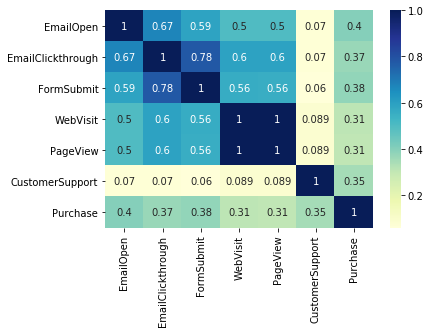

In [722]:
corrMatrix = user_to_activity.corr()
dataplot = sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.show()

In [723]:
# As we can see, WebVisit and PageView have high correlation value, it is better to remove one feature. This would reduce the
# dimentionality of the dataset and make our model coparitively faster.

user_to_activity = user_to_activity.drop(['WebVisit', 'CustomerSupport'], axis=1)

In [ ]:
user_to_activity = user_to_activity.drop(['CustomerSupport'], axis=1)

In [724]:
user_to_activity["Purchased?"] = np.where(user_to_activity["Purchase"] >= 1, 1, 0)

In [725]:
user_to_activity

,EmailOpen,EmailClickthrough,FormSubmit,PageView,Purchase,Purchased?
User_ID,,,,,,
00002acbe042d69,9,0,1,0,0,0
0000a3a34bd07e6,20,0,0,0,0,0
0000ecf58c94668,11,1,1,0,6,1
00012205dd4613b,2,0,0,0,0,0
000198d39a568cf,0,0,0,0,1,1
...,...,...,...,...,...,...
ffffa46241fb077,0,0,0,0,2,1
ffffa4cc0190881,1,0,0,0,0,0
ffffa7beb541707,2,0,1,0,0,0


In [726]:
train = user_to_activity.sample(frac = 0.7)

In [727]:
test = user_to_activity.loc[~user_to_activity.index.isin(train_df.index)]

In [728]:
train = train.to_numpy()
test = test.to_numpy()

In [729]:
X_train = train[:,:-2]

In [730]:
Y_train = train[:,-1]

In [731]:
X_test = test[:,:-2]

In [732]:
Y_test = test[:,-1]

In [733]:
model = LogisticRegression()

In [734]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [735]:
predicted = model.predict(X_test)

In [736]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     71193
           1       0.73      0.02      0.05     31277

    accuracy                           0.70    102470
   macro avg       0.71      0.51      0.43    102470
weighted avg       0.71      0.70      0.58    102470



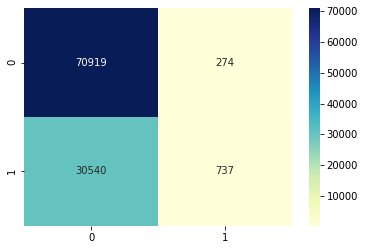

In [737]:
cf_matrix = metrics.confusion_matrix(Y_test, predicted)
sns.heatmap(cf_matrix,  cmap="YlGnBu", annot=True, fmt='g')

In [829]:
# Random Forest Approach
user_to_activity = pd.DataFrame(list(grouped_data.values),index = grouped_data.index,columns = funnel_steps)


In [830]:
user_to_activity = user_to_activity.drop(['CustomerSupport'], axis=1)

In [831]:
user_to_activity["Purchased?"] = np.where(user_to_activity["Purchase"] >= 1, 1, 0)

In [832]:
train = user_to_activity.sample(frac = 0.7)
test = user_to_activity.loc[~user_to_activity.index.isin(train_df.index)]
user_to_activity

,EmailOpen,EmailClickthrough,FormSubmit,WebVisit,PageView,Purchase,Purchased?
User_ID,,,,,,,
00002acbe042d69,9,0,1,0,0,0,0
0000a3a34bd07e6,20,0,0,0,0,0,0
0000ecf58c94668,11,1,1,0,0,6,1
00012205dd4613b,2,0,0,0,0,0,0
000198d39a568cf,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
ffffa46241fb077,0,0,0,0,0,2,1
ffffa4cc0190881,1,0,0,0,0,0,0
ffffa7beb541707,2,0,1,0,0,0,0


In [833]:
train = train.to_numpy()
test = test.to_numpy()

X_train = train[:,:-2]
Y_train = train[:,-1]

X_test = test[:,:-2]
Y_test = test[:,-1]

In [834]:

forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train, Y_train)

In [835]:
rf_predicted = forest.predict(X_test)

In [836]:
rf_predicted.shape

(102470,)

In [837]:
print(metrics.classification_report(Y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     71193
           1       0.96      0.72      0.82     31277

    accuracy                           0.91    102470
   macro avg       0.93      0.85      0.88    102470
weighted avg       0.91      0.91      0.90    102470



In [838]:
feature_importance = forest.feature_importances_

In [839]:
feature_importance

array([0.6658364 , 0.0856997 , 0.17973253, 0.03433549, 0.03439587])

In [840]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(feature_importance)[::-1]

In [884]:
print("Feature ranking:")
features = ['EmailOpen','EmailClickthrough', 'FormSubmit', 'WebVisit', 'PageView']
for f in range(X_train.shape[1]):
#     print("%d. feature {} (%f)" % (f + 1 , features[f], feature_importance[indices[f]]))
    print("{0}. {1} = {2}".format(f  + 1, features[f], round(feature_importance[indices[f]], 2)))

Feature ranking:
1. EmailOpen = 0.67
2. EmailClickthrough = 0.18
3. FormSubmit = 0.09
4. WebVisit = 0.03
5. PageView = 0.03


In [842]:
df_test = pd.read_csv("C:/Users/rashm/Desktop/6Sense/6sense_DS_TakeHome_Challenge/2021_6sense_DS_Takehome_Challenge/test.tsv", sep = '\t', header = None)

In [843]:
df_test.head(10)

,0,1,2
0,0000ecf58c94668,2015-05-20,EmailOpen
1,0000ecf58c94668,2015-06-11,EmailOpen
2,0000ecf58c94668,2015-06-29,EmailOpen
3,0000ecf58c94668,2015-07-05,EmailOpen
4,0000ecf58c94668,2015-07-29,EmailOpen
5,000132f21724ee2,2015-05-15,EmailClickthrough
6,000132f21724ee2,2015-05-15,EmailOpen
7,0001b315b991cf0,2015-05-06,EmailOpen
8,0001b315b991cf0,2015-06-29,EmailOpen
9,0001b315b991cf0,2015-06-30,EmailOpen


In [844]:
df_test.columns = ['User_ID','Activity_Date','Activity_Type']

In [845]:
df_test.sort_values(by="Activity_Date",ascending=True, inplace=True)

In [846]:
df_test

,User_ID,Activity_Date,Activity_Type
687866,d419eae525d4301,2015-05-01,EmailOpen
339539,5d7c05e8f37b353,2015-05-01,EmailOpen
608390,b6de84cb47e7826,2015-05-01,EmailOpen
226398,3c2f9fd36293bc7,2015-05-01,WebVisit
226397,3c2f9fd36293bc7,2015-05-01,PageView
...,...,...,...
296590,50c39c3bfaf98a5,2015-07-31,EmailOpen
296637,50c6ac0d3256c47,2015-07-31,EmailOpen
57088,0dedb7bfe7e2c52,2015-07-31,FormSubmit
57090,0dedb7bfe7e2c52,2015-07-31,WebVisit


In [847]:
test_activities = df_test["Activity_Type"].unique()
test_activities

array(['EmailOpen', 'WebVisit', 'PageView', 'EmailClickthrough',
       'FormSubmit'], dtype=object)

In [848]:
activity_steps_test = ['EmailOpen', 'WebVisit', 'PageView', 'EmailClickthrough', 'FormSubmit']

In [755]:
grouped_test = df_test.groupby("User_ID").apply(funnelize, activity_steps_test)

In [849]:
user_to_activity_test = pd.DataFrame(list(grouped_test.values),index = grouped_test.index,columns = activity_steps_test)

In [850]:
user_to_activity_test

,EmailOpen,WebVisit,PageView,EmailClickthrough,FormSubmit
User_ID,,,,,
0000ecf58c94668,5,0,0,0,0
000132f21724ee2,1,0,0,1,0
0001b315b991cf0,3,0,0,0,0
000269150971d08,4,0,0,0,0
000297ba4fa5026,3,0,0,0,0
...,...,...,...,...,...
fffc7f2ad169c6b,1,0,0,0,0
fffd77a0266d37c,3,1,1,0,1
fffed482b52afd8,1,0,0,0,0


In [851]:
# user_to_activity_test = user_to_activity_test.drop('WebVisit', axis = 1)

In [852]:
user_to_activity_test_arr = user_to_activity_test.to_numpy()

In [853]:
user_to_activity_test_arr.shape

(132810, 5)

In [854]:
predicted_test = forest.predict(user_to_activity_test_arr)

In [855]:
output = forest.predict_proba(user_to_activity_test_arr)

In [856]:
output = pd.DataFrame(output)

In [857]:
output

,0,1
0,0.904387,0.095613
1,0.932466,0.067534
2,0.916694,0.083306
3,0.913956,0.086044
4,0.916694,0.083306
...,...,...
132805,0.940409,0.059591
132806,0.899152,0.100848
132807,0.940409,0.059591
132808,0.940409,0.059591


In [858]:
user_to_activity_test['User_ID'] = user_to_activity_test.index

In [859]:
user_to_activity_test.index = range(132810)
output.index = range(132810)


In [860]:
output_with_activities = pd.concat([user_to_activity_test, output], axis = 1)

In [861]:
output_with_activities

,EmailOpen,WebVisit,PageView,EmailClickthrough,FormSubmit,User_ID,0,1
0,5,0,0,0,0,0000ecf58c94668,0.904387,0.095613
1,1,0,0,1,0,000132f21724ee2,0.932466,0.067534
2,3,0,0,0,0,0001b315b991cf0,0.916694,0.083306
3,4,0,0,0,0,000269150971d08,0.913956,0.086044
4,3,0,0,0,0,000297ba4fa5026,0.916694,0.083306
...,...,...,...,...,...,...,...,...
132805,1,0,0,0,0,fffc7f2ad169c6b,0.940409,0.059591
132806,3,1,1,0,1,fffd77a0266d37c,0.899152,0.100848
132807,1,0,0,0,0,fffed482b52afd8,0.940409,0.059591
132808,1,0,0,0,0,ffffa4cc0190881,0.940409,0.059591


In [862]:
output_with_activities.columns = ['EmailOpen','WebVisit','PageView','EmailClickthrough', 'FormSubmit', 'User_ID', 'noPurchase','willPurchase']

In [863]:
output_with_activities

,EmailOpen,WebVisit,PageView,EmailClickthrough,FormSubmit,User_ID,noPurchase,willPurchase
0,5,0,0,0,0,0000ecf58c94668,0.904387,0.095613
1,1,0,0,1,0,000132f21724ee2,0.932466,0.067534
2,3,0,0,0,0,0001b315b991cf0,0.916694,0.083306
3,4,0,0,0,0,000269150971d08,0.913956,0.086044
4,3,0,0,0,0,000297ba4fa5026,0.916694,0.083306
...,...,...,...,...,...,...,...,...
132805,1,0,0,0,0,fffc7f2ad169c6b,0.940409,0.059591
132806,3,1,1,0,1,fffd77a0266d37c,0.899152,0.100848
132807,1,0,0,0,0,fffed482b52afd8,0.940409,0.059591
132808,1,0,0,0,0,ffffa4cc0190881,0.940409,0.059591


In [864]:
potential_buyers = output_with_activities.sort_values(by = 'willPurchase', ascending = False)

In [865]:
top1000_users = potential_buyers.nlargest(1000, 'willPurchase')

In [866]:
top1000_users = top1000_users[['User_ID','willPurchase']]

In [867]:
top1000_users

,User_ID,willPurchase
70415,7ba6c12d9d7c3f9,0.9825
19888,200b4bcdd0b35e8,0.9825
81010,90b8ac5d9e0d2cb,0.9825
42229,4708979d4ea1c79,0.9825
46684,4ef8fad8fe024f9,0.9825
...,...,...
98638,b4d0a0fbd88a88c,0.6200
122899,e97a63502f95840,0.6200
13380,154f19ffdb8b1ab,0.6200
17494,1c19ddd9797515d,0.6200


In [868]:
top1000_users.to_csv('Top_1000_rf.csv')

In [875]:
# Using Neural Network

mlp = MLPClassifier(hidden_layer_sizes=(5,8,8), activation='relu', solver='adam', max_iter=1000)

In [876]:
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [871]:
predict_test = mlp.predict(X_test)

In [872]:
nn_cf_matrix_test = metrics.confusion_matrix(Y_test,predict_test)

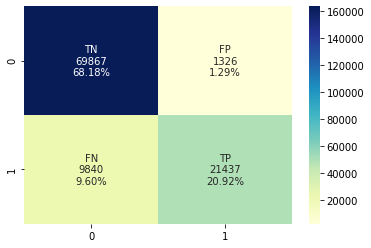

In [873]:
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                nn_cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     nn_cf_matrix_test.flatten()/np.sum(nn_cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(nn_cf_matrix_train, cmap="YlGnBu", annot=labels, fmt='')

In [874]:
print(metrics.classification_report(Y_test,predict_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     71193
           1       0.94      0.69      0.79     31277

    accuracy                           0.89    102470
   macro avg       0.91      0.83      0.86    102470
weighted avg       0.90      0.89      0.89    102470

